# Individual Planning Project (DSCI 100)

In [1]:
library(tidyverse) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Data Description

This data was collected by a computer science research group lead by Frank Wood at UBC. This information was fromm a MineCraft server they set up to better understand how players interact with the game so that they can train AI to respond and talk to players.

#### 1. Players Dataset

In [2]:
players_data <- read_csv("players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


|**Variable Name**|**Variable Type**|**Description**|
|:----------------|:---------------:|:--------------|
|experience       |Character        |Player's level in the game|
|subscribe        |Logical          |If the player has subscribed|
|hashedEmail      |Character        |Player's email|
|played_hours     |Double           |Total number of hours played|
|name             |Character        |Player's name|
|gender           |Character        |Player's gender|
|Age              |Double           |Player's Age|

- Number of observations: 196
- Number of variables: 7

Potential issues in data:
- Missing data in Age

In [3]:
players_summary <- players_data |>
    summarize(avg_played_hours = mean(played_hours),
              avg_age = mean(Age, na.rm = TRUE)) |>
    mutate(avg_played_hours = round(avg_played_hours, 2),
           avg_age = round(avg_age, 2))
players_summary

avg_played_hours,avg_age
<dbl>,<dbl>
5.85,21.14


#### 2. Sessions Dataset

In [4]:
sessions_data <- read_csv("sessions.csv")

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


|**Variable Name**|**Varibale Type**|**Description**|
|:----------------|:---------------:|:--------------|
|hashedEmail      |Character        |Player's email |
|start_time       |Character        |Session start time|
|end_time         |Character        |Session end time|
|original_start_time|Double         |Session start time (Unix timestamp format)|
|original_end_time|Double           |Session end time (Unix timestamp format)|

- Number of observations: 1535
- Number of variables: 5

Potential issues in data:
- Missing data in end_time and original_end_time
- end_time and start_time will both need to be divided into two seperate columns (date and time) to make the dataset tidy 

In [5]:
sessions_summary <- sessions_data |>
    summarize(avg_start_time = mean(original_start_time),
              avg_end_time = mean(original_end_time, na.rm = TRUE)) |>
    mutate(avg_start_time = round(avg_start_time, 2),
           avg_end_time = round(avg_end_time, 2))
sessions_summary

avg_start_time,avg_end_time
<dbl>,<dbl>
1.719201e+12,1.719196e+12


## Questions

**Broad question:** We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

**My question:** Can age and total gameplay hours predict a player's experience level?

This will address the broad question since we are trying to find a correlation between a player's experience level and their age and/or total gameply duration. Age and gameplay duration will tell us the kinds of players while players with a higher experience level will likely contribute more data. To wrangle to apply a predictive method, experience will have to be changed to a factor and NA should be omitted. 

## Exploratory Data Analysis and Visualization 

In [6]:
#loading the data into R and tidying
players_data <- read_csv("players.csv") |>
    mutate(experience = as_factor(experience)) |>
    na.omit()
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


**Mean value for quantitative variables in players.csv reported in a table above under data description.**

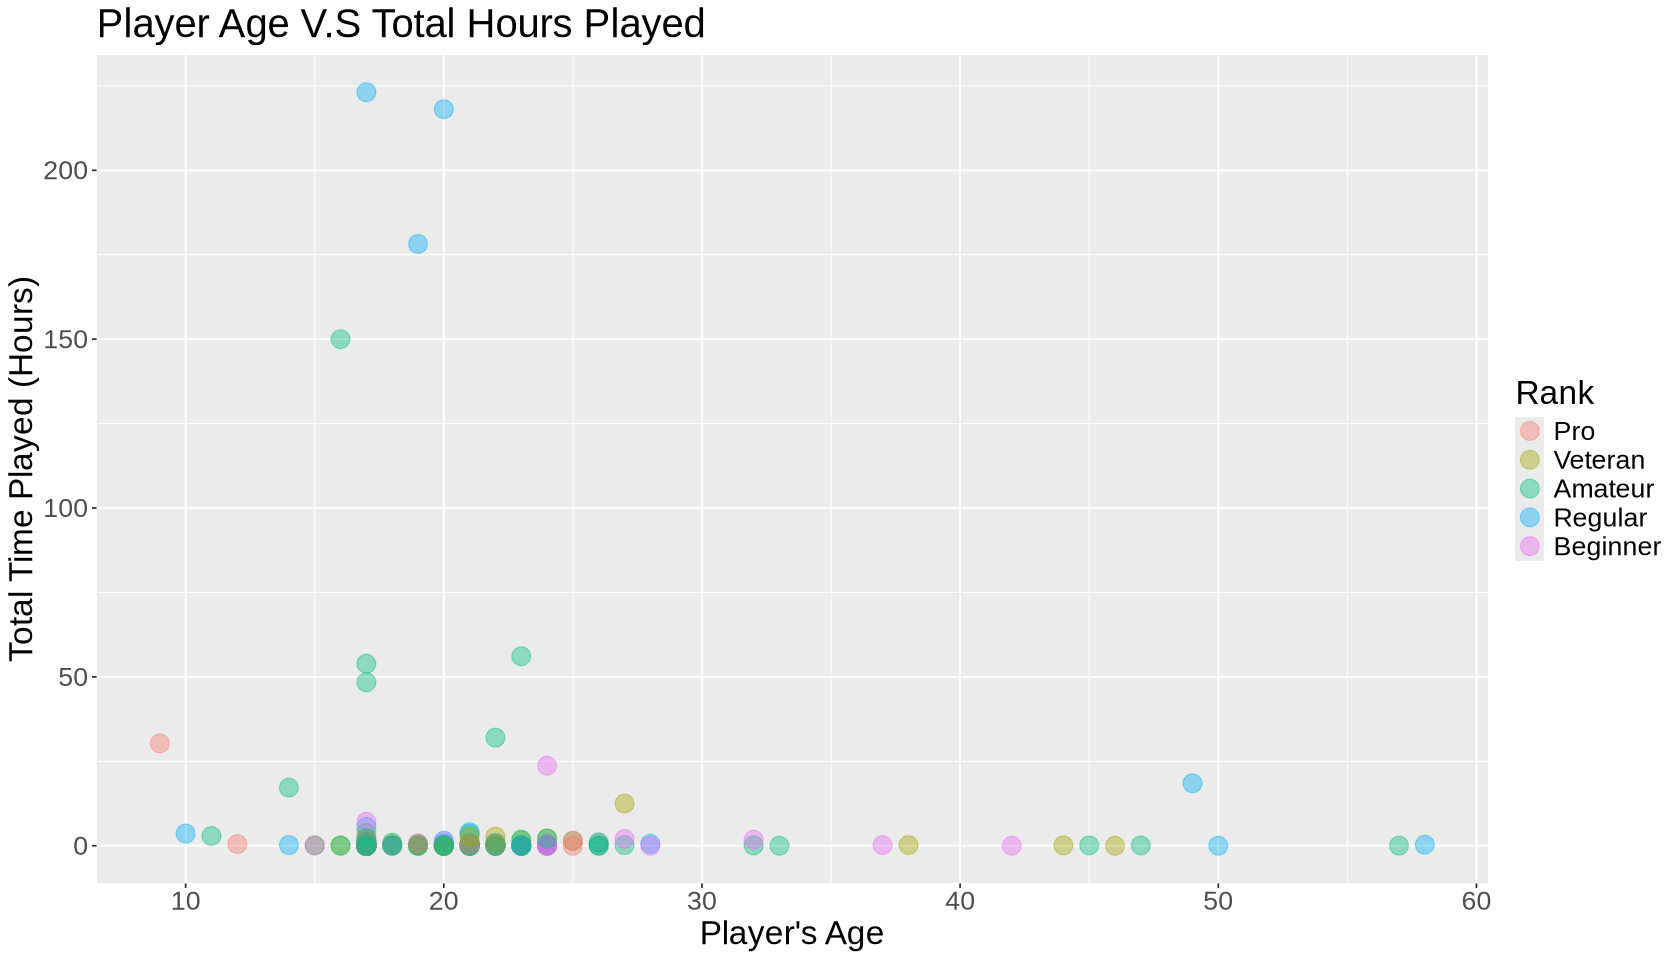

In [7]:
options(repr.plot.height = 8, repr.plot.width = 14)
players_scatter <- players_data |>
    ggplot(aes(x = Age, y = played_hours, colour = experience)) +
    geom_point(alpha = 0.4, size = 5) +
    labs(x = "Player's Age", y = "Total Time Played (Hours)", colour = "Rank") +
    theme(text = element_text(size = 20)) +
    ggtitle("Player Age V.S Total Hours Played")
players_scatter

I see a weak correlation between the total number of hours played and the players age. Players at age 15-25 tend to spend the most time playing Minecraft. Those who have accumulated the most hours are either regular or amateur in rank. Despite these observations, I am not noticing any significant relationships.

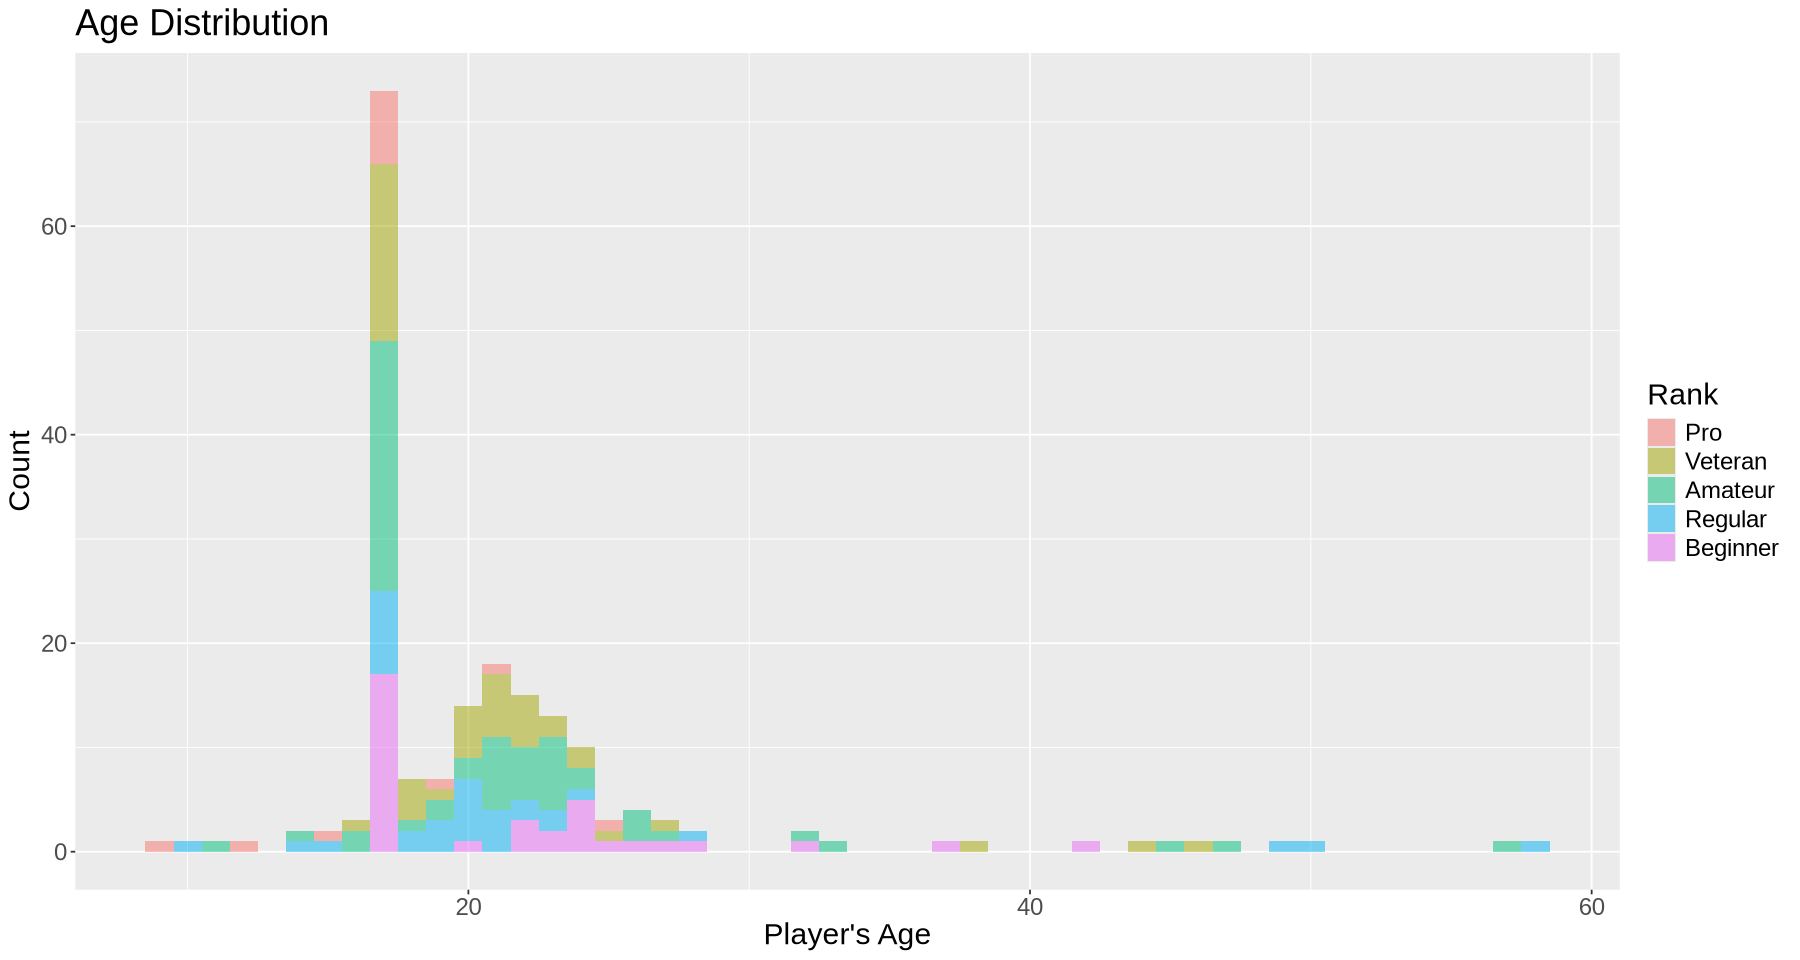

In [8]:
options(repr.plot.height = 8, repr.plot.width = 15)
players_bar <- players_data |>
    ggplot(aes(x = Age, fill = experience)) +
    geom_histogram(binwidth = 1, alpha = 0.5) +
    labs(x = "Player's Age", y = "Count", fill = "Rank") +
    ggtitle("Age Distribution") +
    theme(text = element_text(size = 18))
players_bar

This plot shows that most players are within the age range of approximately 15-25, which is who a majority of the data will be from when predicting experience level. Looking at this bar plot, it seems that there are a higher number of pro players under the age of 25, and as age increases, most players are at a regular or amateur rank. However, similar to the previous plot, I am not moticing a significant relationship between age and experience level.

## Methods and Plan

I decided to use k-NN classification to address this question since it can be used to predict a categorical class/label, in this case a player's experience, whereas k-NN and linear regression predict numerical values. To apply this method, no assumptions need to be made. Possible limitations of k-NN classification include class imbalance and missing data, which both lead to bias in the predictions. To select the best model, different K values would have to be compared for accuracy to avoid underfitting or overfitting. This can be done using cross validation. Before applying this model, a model specification with the specified K values would have to be made and weight_func = "rectangular" should be used to ensure each vote is weighted equally. The data would also need to be standardized using step_scale and step_center so that the variables with differnt scales contribute equally. Lastly, the processed data should be fitted to a workflow before predicting.

## GitHub Repository 

**Link to respository:** https://github.com/chloe8162022/individual_project_dsci100.git 